In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
df = pd.read_csv('Q1_data.csv')


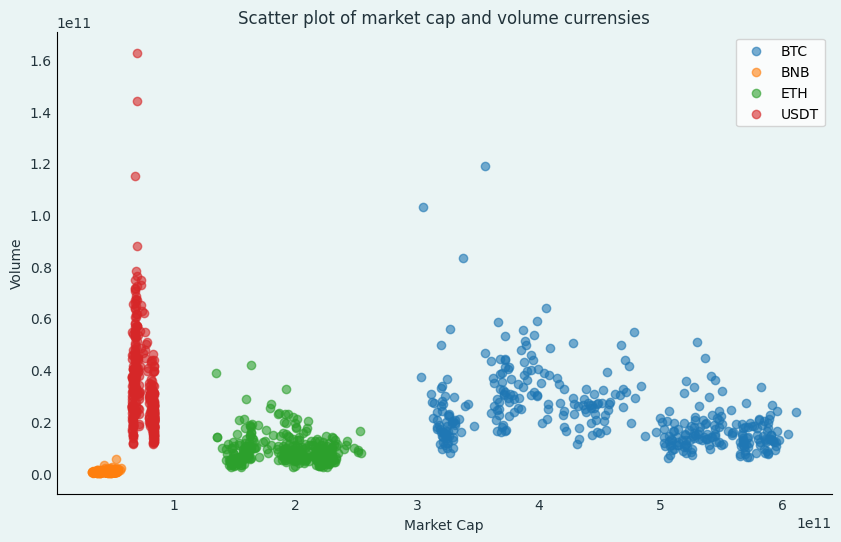

In [172]:
market_cap, volume = df.market_cap, df.volume

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df[df['symbol']=='BTC']["market_cap"], df[df['symbol']=='BTC']["volume"], marker="o", cmap="viridis", alpha=0.6, label='BTC')
ax.scatter(df[df['symbol']=='BNB']["market_cap"], df[df['symbol']=='BNB']["volume"], marker="o", cmap="viridis", alpha=0.6, label='BNB')
ax.scatter(df[df['symbol']=='ETH']["market_cap"], df[df['symbol']=='ETH']["volume"], marker="o", cmap="viridis", alpha=0.6, label='ETH')
ax.scatter(df[df['symbol']=='USDT']["market_cap"], df[df['symbol']=='USDT']["volume"], marker="o", cmap="viridis", alpha=0.6, label='USDT')
ax.set_title(
    "Scatter plot of market cap and volume currensies", fontsize=12, color="#22333b"
)
ax.set_ylabel("Volume", fontsize=10, color="#22333b")
ax.set_xlabel("Market Cap", fontsize=10, color="#22333b")
ax.tick_params(axis="both", length=0, labelcolor="#22333b")
ax.set_facecolor("#EAF4f4")
ax.legend()
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


Implementation of DBScan


Now we scale the dataframe and then use DBScan for different values of epsilon and minimum samples that we require to count the data as core point.
in the end we found that best result is developed from choosing 4 min_points.
so we deeply check the different epsilon values for min_points = 4 and the we show graphs of best results of another min_points that we have checked.

Minimum Points = 4
Eps = 0.1

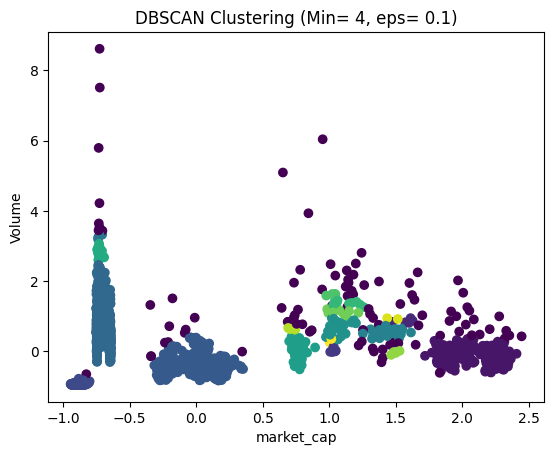

In [183]:
data = df

# Scaling the MarketCap and Volume
scaler = StandardScaler()
data[['market_cap', 'volume']] = scaler.fit_transform(data[['market_cap', 'volume']])

#DBSCAN parameters
eps = 0.1
min_samples = 4

# DBScan Function
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['cluster'] = dbscan.fit_predict(data[['market_cap', 'volume']])

# Visualizing 
plt.scatter(data['market_cap'], data['volume'], c=data['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering (Min= 4, eps= 0.1)')
plt.xlabel('market_cap')
plt.ylabel('Volume')
plt.show()



Minimum Points = 4
Eps = 0.15

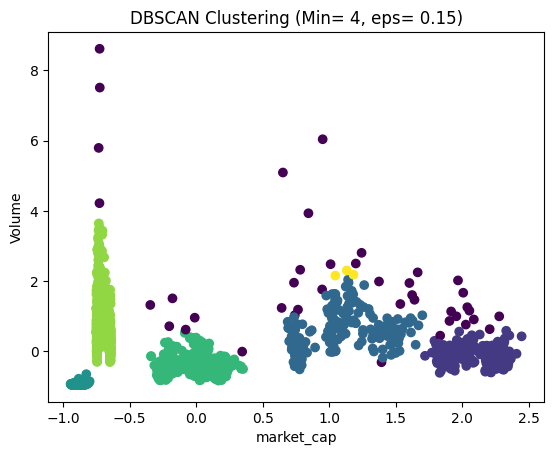

In [184]:
data = df

# Scaling the MarketCap and Volume
scaler = StandardScaler()
data[['market_cap', 'volume']] = scaler.fit_transform(data[['market_cap', 'volume']])

#DBSCAN parameters
eps = 0.15
min_samples = 4

# DBScan Function
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['cluster'] = dbscan.fit_predict(data[['market_cap', 'volume']])

# Visualizing 
plt.scatter(data['market_cap'], data['volume'], c=data['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering (Min= 4, eps= 0.15)')
plt.xlabel('market_cap')
plt.ylabel('Volume')
plt.show()



Minimum Points = 4
Eps = 0.2

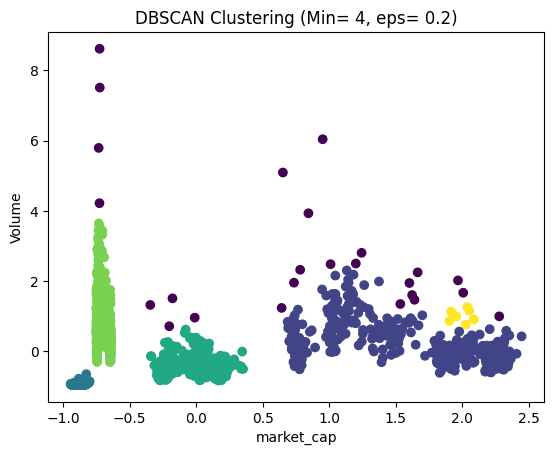

In [185]:
data = df

# Scaling the MarketCap and Volume
scaler = StandardScaler()
data[['market_cap', 'volume']] = scaler.fit_transform(data[['market_cap', 'volume']])

#DBSCAN parameters
eps = 0.2
min_samples = 4

# DBScan Function
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['cluster'] = dbscan.fit_predict(data[['market_cap', 'volume']])

# Visualizing 
plt.scatter(data['market_cap'], data['volume'], c=data['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering (Min= 4, eps= 0.2)')
plt.xlabel('market_cap')
plt.ylabel('Volume')
plt.show()



Minimum Points = 4
Eps = 0.21

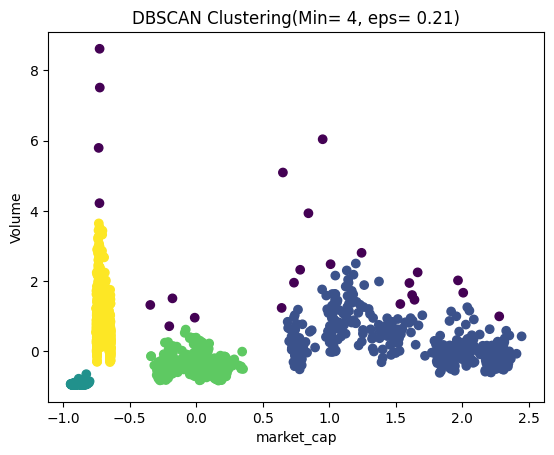

In [186]:
data = df

# Scaling the MarketCap and Volume
scaler = StandardScaler()
data[['market_cap', 'volume']] = scaler.fit_transform(data[['market_cap', 'volume']])

#DBSCAN parameters
eps = 0.21
min_samples = 4

# DBScan Function
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['cluster'] = dbscan.fit_predict(data[['market_cap', 'volume']])

# Visualizing 
plt.scatter(data['market_cap'], data['volume'], c=data['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering(Min= 4, eps= 0.21)')
plt.xlabel('market_cap')
plt.ylabel('Volume')
plt.show()



Minimum Points = 4
Eps = 0.25

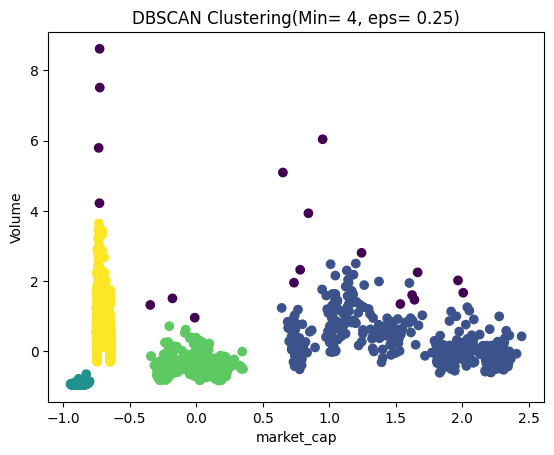

In [187]:
data = df

# Scaling the MarketCap and Volume
scaler = StandardScaler()
data[['market_cap', 'volume']] = scaler.fit_transform(data[['market_cap', 'volume']])

#DBSCAN parameters
eps = 0.25
min_samples = 4

# DBScan Function
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['cluster'] = dbscan.fit_predict(data[['market_cap', 'volume']])

# Visualizing 
plt.scatter(data['market_cap'], data['volume'], c=data['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering(Min= 4, eps= 0.25)')
plt.xlabel('market_cap')
plt.ylabel('Volume')
plt.show()



Minimum Points = 5
Eps = 0.2

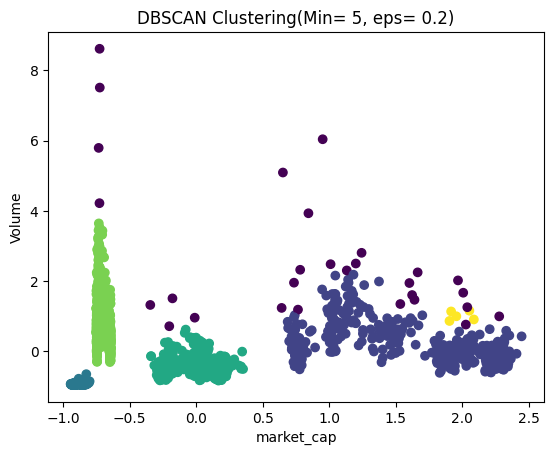

In [188]:
data = df

# Scaling the MarketCap and Volume
scaler = StandardScaler()
data[['market_cap', 'volume']] = scaler.fit_transform(data[['market_cap', 'volume']])

#DBSCAN parameters
eps = 0.2
min_samples = 5

# DBScan Function
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['cluster'] = dbscan.fit_predict(data[['market_cap', 'volume']])

# Visualizing 
plt.scatter(data['market_cap'], data['volume'], c=data['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering(Min= 5, eps= 0.2)')
plt.xlabel('market_cap')
plt.ylabel('Volume')
plt.show()


Minimum Points = 3
Eps = 0.23

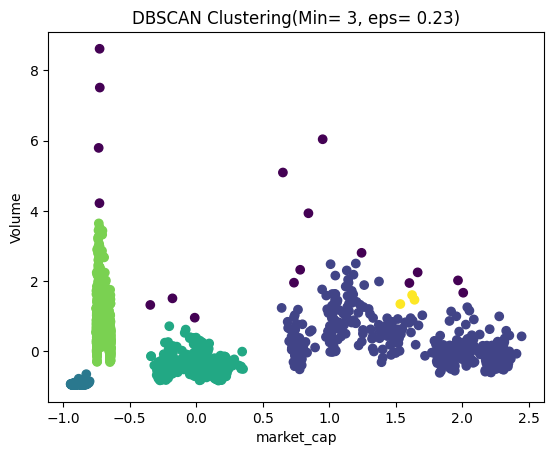

In [189]:
data = df

# Scaling the MarketCap and Volume
scaler = StandardScaler()
data[['market_cap', 'volume']] = scaler.fit_transform(data[['market_cap', 'volume']])

#DBSCAN parameters
eps = 0.23
min_samples = 3

# DBScan Function
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['cluster'] = dbscan.fit_predict(data[['market_cap', 'volume']])

# Visualizing 
plt.scatter(data['market_cap'], data['volume'], c=data['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering(Min= 3, eps= 0.23)')
plt.xlabel('market_cap')
plt.ylabel('Volume')
plt.show()



Minimum Points = 2
Eps = 0.25

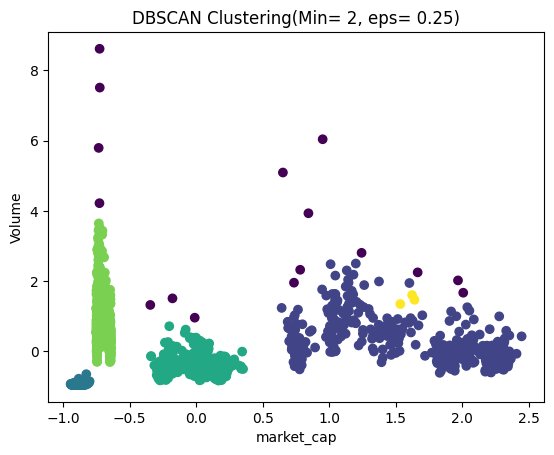

In [190]:
data = df

# Scaling the MarketCap and Volume
scaler = StandardScaler()
data[['market_cap', 'volume']] = scaler.fit_transform(data[['market_cap', 'volume']])

#DBSCAN parameters
eps = 0.25
min_samples = 2

# DBScan Function
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['cluster'] = dbscan.fit_predict(data[['market_cap', 'volume']])

# Visualizing 
plt.scatter(data['market_cap'], data['volume'], c=data['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering(Min= 2, eps= 0.25)')
plt.xlabel('market_cap')
plt.ylabel('Volume')
plt.show()

